**RANDOM PROJECTION**

**1. GAUSSIAN RANDOM PROJECTION**

**IMPORT RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import pickle
import time

In [2]:
%matplotlib inline

**LOAD THE MNIST DATASET**

In [3]:
current_path = os.getcwd()

In [4]:
with gzip.open("C:\\Users\\User\\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Dimensionality Reduction\\Linear Projection\\Random Projection\\mnist_data\\mnist.pkl.gz", mode='rb') as file_content:
    train_set, validation_set, test_set = pickle.load(file=file_content, encoding='latin1')
    file_content.close()

**VIEW THE DATASETS**

*Dataset is already scaled otherwise, it MUST be scaled*

In [5]:
train_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [6]:
validation_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 8, 6, ..., 5, 6, 8], dtype=int64))

In [7]:
test_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

**OBTAIN THE FEATURES AND LABELS FOR EACH DATASETS**

*Train dataset*

In [8]:
X_train, y_train = train_set[0], train_set[1]

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

*Validation dataset*

In [11]:
X_validation, y_validation = validation_set[0], validation_set[1]

In [12]:
X_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_validation

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

*Test dataset*

In [14]:
X_test, y_test = test_set[0], test_set[1]

In [15]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

**VERIFY THE SHAPE OF THE DATASETS**

*Necessary for understanding the data split during training*

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


**DEFINE THE INDEX NUMBERS FOR THE DATASETS**

In [18]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))

In [19]:
train_index

range(0, 50000)

In [20]:
validation_index

range(50000, 60000)

In [21]:
test_index

range(60000, 70000)

**BUILD THE DATAFRAME FOR EACH OF THE DATASETS**

*Train dataframe*

In [22]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

In [23]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
49995    5
49996    0
49997    8
49998    4
49999    8
Length: 50000, dtype: int64

*validation dataframe*

In [25]:
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

In [26]:
X_validation

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y_validation

50000    3
50001    8
50002    6
50003    9
50004    6
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 10000, dtype: int64

*test dataframe*

In [28]:
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [29]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Length: 10000, dtype: int64

**SCALE THE VARIOUS DATASETS**

*from sklearn.preprocessing import StandardScaler*

*scaler = StandardScaler()*

*our dataset has already been scaled*

**EXPLORE A SAMPLE DATASET**

In [31]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [32]:
X_validation.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001004,0.000314,0.000049,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027335,0.015602,0.002943,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.210938,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000700,0.000639,0.000205,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022164,0.022407,0.009454,0.000234,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.609375,0.023438,0.0,0.0,0.0,0.0,0.0,0.0


**DISPLAY AN IMAGE SAMPLE**

*train data*

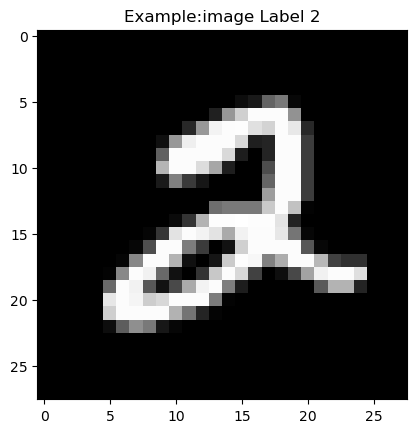

In [34]:
label = y_train.iloc[5]
image = X_train.iloc[5,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

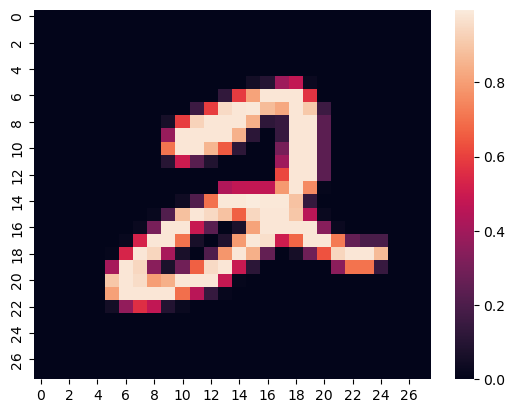

In [35]:
sns.heatmap(data=image, annot=False)

*validation data*

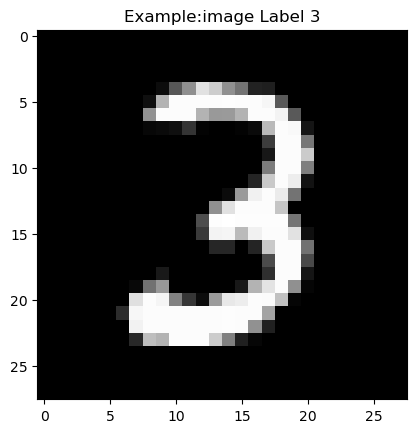

In [36]:
label = y_validation.iloc[12]
image = X_validation.iloc[12,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

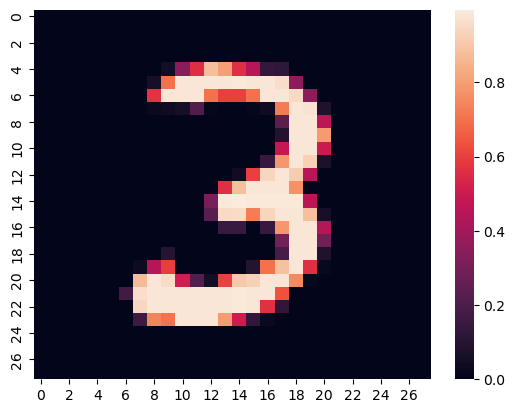

In [37]:
sns.heatmap(data=image, annot=False)

*test data*

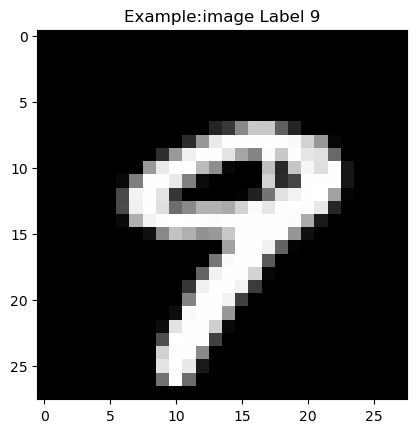

In [38]:
label = y_test.iloc[9]
image = X_test.iloc[9,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

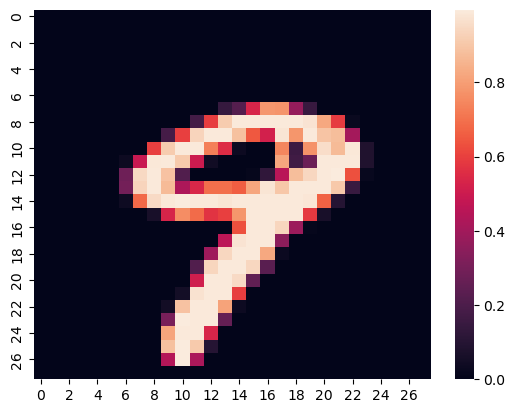

In [39]:
sns.heatmap(data=image, annot=False)

**CREATE THE GRADIENT RANDOM PROJECTION (GRP)**

In [41]:
from sklearn.random_projection import GaussianRandomProjection

In [42]:
model = GaussianRandomProjection(n_components='auto', eps=0.5, random_state=101)

**FIT THE MODEL TO THE VARIOUS DATASET**

*train dataset*

In [43]:
X_train_grp = model.fit_transform(X_train)

In [44]:
X_train_grp = pd.DataFrame(data=X_train_grp, index=train_index)

In [45]:
X_train_grp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
0,-0.239694,-0.264611,0.363175,0.095973,0.254665,-0.164446,0.267480,-0.568493,0.289573,0.412257,...,-0.728514,0.059560,-0.415079,0.136884,0.626119,0.441732,-0.364937,0.349530,0.256559,-0.342012
1,0.101227,0.210219,0.155602,-0.341663,0.039389,-0.313577,0.406429,-0.492156,0.288422,0.237512,...,0.145953,-0.036539,-0.134185,0.004703,0.436128,0.251748,0.102935,0.732980,-0.388017,-0.303020
2,0.224863,-0.048442,0.269251,-0.473375,0.217300,0.017127,-0.063031,-0.156758,-0.040450,0.290590,...,0.309587,0.060693,-0.418417,0.448827,-0.110653,-0.569034,-0.172827,0.121896,0.012981,-0.512102
3,0.469820,0.591407,0.294575,-0.271880,0.486726,-0.496232,-0.043078,-0.239142,0.481599,0.266264,...,0.216606,0.078180,0.050464,-0.112154,-0.084110,0.443963,0.103174,-0.330738,0.078461,-0.856961
4,0.475779,0.212942,0.412486,-0.178729,0.841445,-0.450040,0.397195,-0.694420,0.096652,-0.230335,...,-0.300757,0.340675,-0.356325,0.301573,0.707395,-0.500944,0.162092,-0.126370,-0.397801,-0.830466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.640249,0.234662,0.747478,0.548569,-0.014524,-0.083106,-0.171325,-0.109495,0.187456,0.481137,...,0.332581,-0.057677,-0.549374,0.156926,-0.178991,0.326489,-0.076220,-0.625218,-0.292571,-0.232843
49996,0.236721,0.166107,0.594767,0.358652,0.237193,0.228341,0.202992,-0.522952,-0.010483,0.156802,...,-0.383397,0.195843,-0.142217,-0.216563,0.423456,-0.350716,-0.040899,-0.182826,-0.024828,0.451706
49997,-0.321447,0.125721,0.477276,0.442269,0.044869,-0.190170,-0.040131,-0.048448,-0.051343,0.634579,...,-0.394240,0.180156,-0.096633,0.286029,0.466728,0.683969,0.318147,-0.629806,0.067534,-0.683909
49998,0.187744,0.287297,0.463700,-0.135207,0.667052,-0.191521,-0.163688,-0.060470,0.474291,0.088308,...,-0.077293,0.025761,0.282765,0.135966,0.179936,0.054657,-0.228912,-0.384097,-0.148356,-0.531950


*validation data*

In [46]:
X_validation_grp = model.transform(X_validation)

In [47]:
X_validation_grp = pd.DataFrame(data=X_validation_grp, index=validation_index)

In [48]:
X_validation_grp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
50000,-0.284416,0.459065,0.456970,0.108601,0.485249,-0.526544,0.303048,-0.333617,0.496605,0.560074,...,-0.236800,0.128964,-0.336283,0.353504,0.338382,0.870301,-0.570483,-0.346837,0.175830,-0.605036
50001,0.159790,0.735723,0.483890,0.182637,0.611535,0.081874,0.160734,-0.289362,0.119176,0.048405,...,0.233439,0.235820,-0.297470,0.586005,0.249750,-0.025900,0.476592,-0.790653,0.123990,-0.751891
50002,0.248963,-0.005574,0.231192,-0.390238,0.755992,-0.206712,0.103213,0.280652,-0.076577,0.051369,...,0.392169,0.116006,-0.641071,0.252979,-0.133143,0.171027,-0.355269,0.301011,-0.272791,-0.190283
50003,-0.035568,0.513813,0.742500,0.216241,0.896850,0.180076,-0.476766,-0.271081,0.366177,0.092888,...,-0.611314,0.107052,-0.046539,0.732977,0.490767,-0.412999,-0.248570,-0.078679,0.319902,-0.719032
50004,0.420431,0.577368,1.013816,-0.326080,-0.209529,0.129460,-0.507147,0.048080,0.253810,0.124929,...,-0.293319,0.288320,-0.056605,0.074541,-0.266164,0.331937,0.188399,-0.419039,-0.333479,-0.771049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.338144,0.537802,0.660232,-0.121179,0.860117,0.343173,0.062724,-0.216127,0.209180,0.040033,...,-0.300766,0.054216,-0.517990,0.224234,0.051767,0.216473,-0.529901,-0.654651,-0.196272,-0.696630
59996,-0.246260,0.430090,0.036411,-0.116330,0.671991,-0.198030,0.042795,-0.529617,0.321246,0.356581,...,-0.442260,-0.219600,-0.573724,0.165932,0.231634,0.729056,-0.447751,-0.555005,0.456395,-0.732530
59997,-0.214505,-0.092006,0.375940,-0.085771,0.331879,0.082524,0.082571,-0.186763,0.177189,0.106459,...,-0.437736,-0.318152,-0.185169,-0.070206,0.493303,-0.203142,0.020389,-0.291498,0.231664,-0.181249
59998,0.250642,0.094082,0.111596,-0.301014,0.085075,-0.244731,0.564431,0.279025,-0.048958,-0.492738,...,0.234775,0.099669,-0.261911,-0.114528,0.155146,0.046456,0.190333,0.293170,-0.233812,-0.591085


*test data*

In [49]:
X_test_grp = model.transform(X_test)

In [50]:
X_test_grp = pd.DataFrame(data=X_test_grp, index=test_index)

In [51]:
X_test_grp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
60000,0.199077,0.120529,-0.048580,-0.150529,0.193823,0.040845,0.081259,-0.623328,-0.153356,0.471347,...,-0.073216,0.359834,-0.496354,-0.145901,0.646260,-0.243950,-0.093719,-0.035321,0.382717,0.036602
60001,0.049505,-0.269416,0.135243,0.193338,-0.581309,-0.051954,0.030673,-0.478052,0.076558,0.154597,...,-0.130058,-0.430783,-0.135136,-0.256599,0.372261,0.398093,-0.105566,-0.427180,-0.000520,-0.930411
60002,0.339105,0.122509,0.398307,-0.033967,0.077031,-0.506524,-0.014270,0.278973,0.144387,0.584544,...,0.116520,0.268770,0.007393,0.236878,0.232855,0.352840,0.006413,-0.466254,0.210595,-0.515712
60003,-0.143146,-0.214238,0.660876,-0.200442,0.364346,-0.256068,0.621953,-0.195923,0.299795,0.278803,...,-0.011224,0.052623,-0.511496,-0.018535,0.772895,-0.077258,-0.185000,0.326154,0.154708,-0.437992
60004,-0.123389,0.857883,0.832429,-0.612726,0.641989,0.390592,-0.489698,-0.661088,0.286124,0.336206,...,0.020809,0.439634,-0.486874,0.751539,-0.004536,-0.996643,-0.490836,0.313545,0.196367,-0.461926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.435246,0.409186,0.553777,-0.269782,0.742168,-0.219966,0.041154,-0.963448,0.177316,0.185727,...,-0.147654,-0.027497,-0.701714,0.088505,-0.189065,0.897774,-0.198293,-0.273348,0.133893,-1.088517
69996,-0.275511,0.094364,1.034371,0.273004,0.072574,-0.368487,-0.313203,-0.208809,0.249747,0.957866,...,-0.229198,0.030856,-0.322015,-0.165352,0.431680,0.825998,-0.455752,-0.890644,0.378579,-0.904430
69997,0.534828,0.932548,0.675255,-0.168244,0.920414,-0.330725,0.546697,-0.519402,-0.041923,0.082397,...,-0.097960,0.572574,-0.681920,0.445772,0.402180,-0.322563,-0.093095,-0.483636,0.657600,-0.549418
69998,-0.061015,0.039171,-0.265631,-0.036456,0.636976,-0.631858,0.886029,0.410477,0.443379,0.122815,...,-0.165701,0.300925,-0.633847,0.086989,0.685049,0.062766,-0.362122,-0.438652,0.380475,-0.523698


**VISUALIZE THE EFFECT OF THE COMPONENT SET VARIANCE FOR EACH DATASET**

In [53]:
def scatter_plot(feature_dataframe, label_dataframe, algorithm_name):
    temp_dataframe = pd.DataFrame(data=feature_dataframe.loc[:, 0:1], index=feature_dataframe.index)
    temp_dataframe = pd.concat((temp_dataframe,label_dataframe), axis=1, join='inner')
    temp_dataframe.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data= temp_dataframe, fit_reg=False)
    
    ax = plt.gca()
    ax.set_title(f'Seperation of Observations using {algorithm_name}')

*test data*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


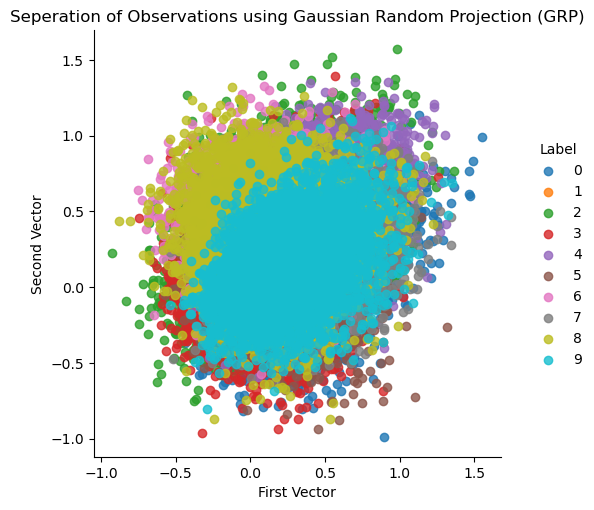

In [54]:
scatter_plot(X_train_grp, y_train, 'Gaussian Random Projection (GRP)')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


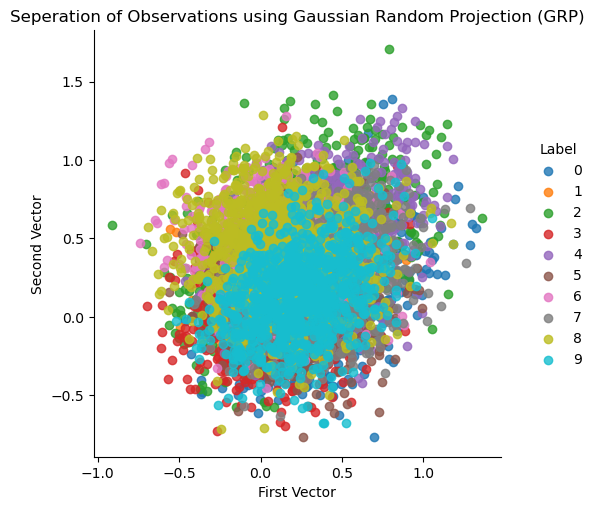

In [55]:
scatter_plot(X_validation_grp, y_validation, 'Gaussian Random Projection (GRP)')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


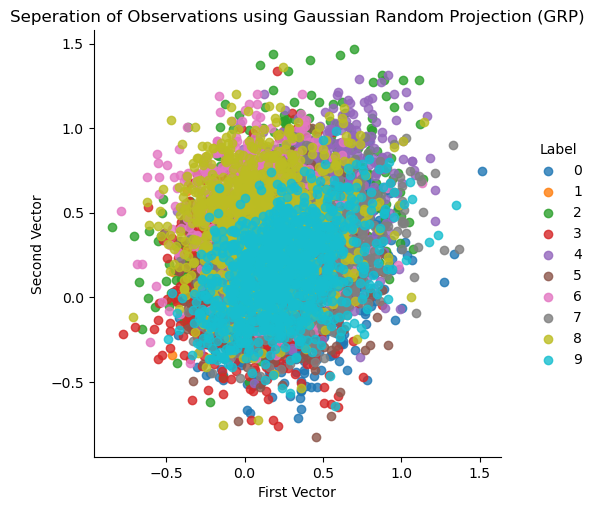

In [56]:
scatter_plot(X_test_grp, y_test, 'Gaussian Random Projection (GRP)')

**2. SPARSE RANDOM PROJECTION (SRP)**

In [57]:
from sklearn.random_projection import SparseRandomProjection as srp

In [59]:
sparse_model = srp(n_components='auto', density='auto', eps=0.5, dense_output=False, random_state=101)

*train dataset*

In [60]:
X_train_srp = model.fit_transform(X_train)

In [61]:
X_train_srp = pd.DataFrame(data=X_train_grp, index=train_index)

In [62]:
X_train_srp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
0,-0.239694,-0.264611,0.363175,0.095973,0.254665,-0.164446,0.267480,-0.568493,0.289573,0.412257,...,-0.728514,0.059560,-0.415079,0.136884,0.626119,0.441732,-0.364937,0.349530,0.256559,-0.342012
1,0.101227,0.210219,0.155602,-0.341663,0.039389,-0.313577,0.406429,-0.492156,0.288422,0.237512,...,0.145953,-0.036539,-0.134185,0.004703,0.436128,0.251748,0.102935,0.732980,-0.388017,-0.303020
2,0.224863,-0.048442,0.269251,-0.473375,0.217300,0.017127,-0.063031,-0.156758,-0.040450,0.290590,...,0.309587,0.060693,-0.418417,0.448827,-0.110653,-0.569034,-0.172827,0.121896,0.012981,-0.512102
3,0.469820,0.591407,0.294575,-0.271880,0.486726,-0.496232,-0.043078,-0.239142,0.481599,0.266264,...,0.216606,0.078180,0.050464,-0.112154,-0.084110,0.443963,0.103174,-0.330738,0.078461,-0.856961
4,0.475779,0.212942,0.412486,-0.178729,0.841445,-0.450040,0.397195,-0.694420,0.096652,-0.230335,...,-0.300757,0.340675,-0.356325,0.301573,0.707395,-0.500944,0.162092,-0.126370,-0.397801,-0.830466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.640249,0.234662,0.747478,0.548569,-0.014524,-0.083106,-0.171325,-0.109495,0.187456,0.481137,...,0.332581,-0.057677,-0.549374,0.156926,-0.178991,0.326489,-0.076220,-0.625218,-0.292571,-0.232843
49996,0.236721,0.166107,0.594767,0.358652,0.237193,0.228341,0.202992,-0.522952,-0.010483,0.156802,...,-0.383397,0.195843,-0.142217,-0.216563,0.423456,-0.350716,-0.040899,-0.182826,-0.024828,0.451706
49997,-0.321447,0.125721,0.477276,0.442269,0.044869,-0.190170,-0.040131,-0.048448,-0.051343,0.634579,...,-0.394240,0.180156,-0.096633,0.286029,0.466728,0.683969,0.318147,-0.629806,0.067534,-0.683909
49998,0.187744,0.287297,0.463700,-0.135207,0.667052,-0.191521,-0.163688,-0.060470,0.474291,0.088308,...,-0.077293,0.025761,0.282765,0.135966,0.179936,0.054657,-0.228912,-0.384097,-0.148356,-0.531950


*validation dataset*

In [63]:
X_validation_srp = model.transform(X_validation)

In [64]:
X_validation_srp = pd.DataFrame(data=X_validation_srp, index=validation_index)

In [65]:
X_validation_srp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
50000,-0.284416,0.459065,0.456970,0.108601,0.485249,-0.526544,0.303048,-0.333617,0.496605,0.560074,...,-0.236800,0.128964,-0.336283,0.353504,0.338382,0.870301,-0.570483,-0.346837,0.175830,-0.605036
50001,0.159790,0.735723,0.483890,0.182637,0.611535,0.081874,0.160734,-0.289362,0.119176,0.048405,...,0.233439,0.235820,-0.297470,0.586005,0.249750,-0.025900,0.476592,-0.790653,0.123990,-0.751891
50002,0.248963,-0.005574,0.231192,-0.390238,0.755992,-0.206712,0.103213,0.280652,-0.076577,0.051369,...,0.392169,0.116006,-0.641071,0.252979,-0.133143,0.171027,-0.355269,0.301011,-0.272791,-0.190283
50003,-0.035568,0.513813,0.742500,0.216241,0.896850,0.180076,-0.476766,-0.271081,0.366177,0.092888,...,-0.611314,0.107052,-0.046539,0.732977,0.490767,-0.412999,-0.248570,-0.078679,0.319902,-0.719032
50004,0.420431,0.577368,1.013816,-0.326080,-0.209529,0.129460,-0.507147,0.048080,0.253810,0.124929,...,-0.293319,0.288320,-0.056605,0.074541,-0.266164,0.331937,0.188399,-0.419039,-0.333479,-0.771049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.338144,0.537802,0.660232,-0.121179,0.860117,0.343173,0.062724,-0.216127,0.209180,0.040033,...,-0.300766,0.054216,-0.517990,0.224234,0.051767,0.216473,-0.529901,-0.654651,-0.196272,-0.696630
59996,-0.246260,0.430090,0.036411,-0.116330,0.671991,-0.198030,0.042795,-0.529617,0.321246,0.356581,...,-0.442260,-0.219600,-0.573724,0.165932,0.231634,0.729056,-0.447751,-0.555005,0.456395,-0.732530
59997,-0.214505,-0.092006,0.375940,-0.085771,0.331879,0.082524,0.082571,-0.186763,0.177189,0.106459,...,-0.437736,-0.318152,-0.185169,-0.070206,0.493303,-0.203142,0.020389,-0.291498,0.231664,-0.181249
59998,0.250642,0.094082,0.111596,-0.301014,0.085075,-0.244731,0.564431,0.279025,-0.048958,-0.492738,...,0.234775,0.099669,-0.261911,-0.114528,0.155146,0.046456,0.190333,0.293170,-0.233812,-0.591085


*test dataset*

In [66]:
X_test_srp = model.transform(X_test)

In [67]:
X_test_srp = pd.DataFrame(data=X_test_srp, index=test_index)

In [68]:
X_test_srp

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
60000,0.199077,0.120529,-0.048580,-0.150529,0.193823,0.040845,0.081259,-0.623328,-0.153356,0.471347,...,-0.073216,0.359834,-0.496354,-0.145901,0.646260,-0.243950,-0.093719,-0.035321,0.382717,0.036602
60001,0.049505,-0.269416,0.135243,0.193338,-0.581309,-0.051954,0.030673,-0.478052,0.076558,0.154597,...,-0.130058,-0.430783,-0.135136,-0.256599,0.372261,0.398093,-0.105566,-0.427180,-0.000520,-0.930411
60002,0.339105,0.122509,0.398307,-0.033967,0.077031,-0.506524,-0.014270,0.278973,0.144387,0.584544,...,0.116520,0.268770,0.007393,0.236878,0.232855,0.352840,0.006413,-0.466254,0.210595,-0.515712
60003,-0.143146,-0.214238,0.660876,-0.200442,0.364346,-0.256068,0.621953,-0.195923,0.299795,0.278803,...,-0.011224,0.052623,-0.511496,-0.018535,0.772895,-0.077258,-0.185000,0.326154,0.154708,-0.437992
60004,-0.123389,0.857883,0.832429,-0.612726,0.641989,0.390592,-0.489698,-0.661088,0.286124,0.336206,...,0.020809,0.439634,-0.486874,0.751539,-0.004536,-0.996643,-0.490836,0.313545,0.196367,-0.461926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.435246,0.409186,0.553777,-0.269782,0.742168,-0.219966,0.041154,-0.963448,0.177316,0.185727,...,-0.147654,-0.027497,-0.701714,0.088505,-0.189065,0.897774,-0.198293,-0.273348,0.133893,-1.088517
69996,-0.275511,0.094364,1.034371,0.273004,0.072574,-0.368487,-0.313203,-0.208809,0.249747,0.957866,...,-0.229198,0.030856,-0.322015,-0.165352,0.431680,0.825998,-0.455752,-0.890644,0.378579,-0.904430
69997,0.534828,0.932548,0.675255,-0.168244,0.920414,-0.330725,0.546697,-0.519402,-0.041923,0.082397,...,-0.097960,0.572574,-0.681920,0.445772,0.402180,-0.322563,-0.093095,-0.483636,0.657600,-0.549418
69998,-0.061015,0.039171,-0.265631,-0.036456,0.636976,-0.631858,0.886029,0.410477,0.443379,0.122815,...,-0.165701,0.300925,-0.633847,0.086989,0.685049,0.062766,-0.362122,-0.438652,0.380475,-0.523698


**VISUALIZE THE EFFECT OF THE COMPONENT SET VARIANCE FOR EACH DATASET**

*train dataset*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


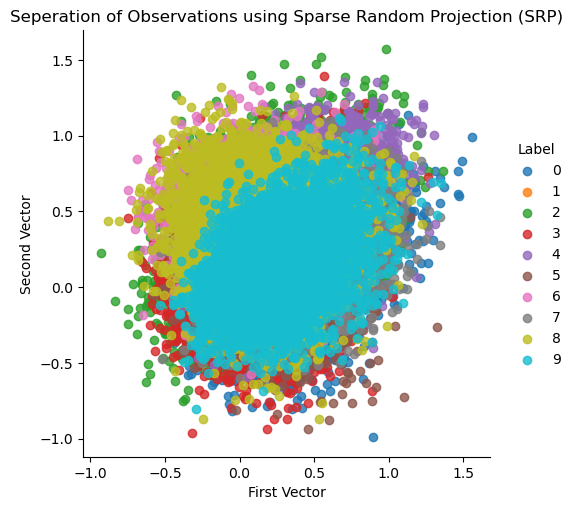

In [69]:
scatter_plot(X_train_grp, y_train, 'Sparse Random Projection (SRP)')

*validation dataset*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


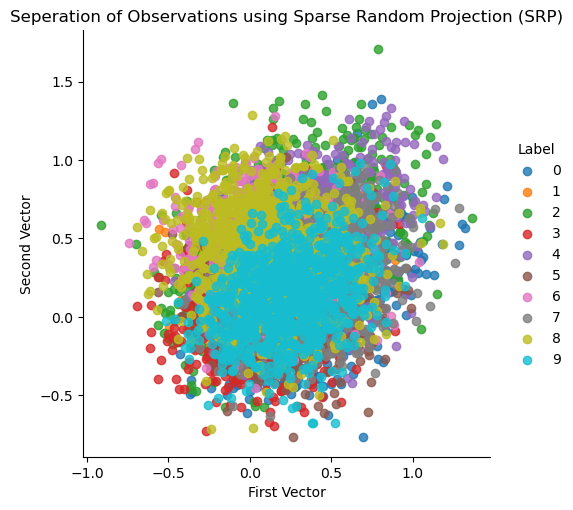

In [70]:
scatter_plot(X_validation_grp, y_validation, 'Sparse Random Projection (SRP)')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


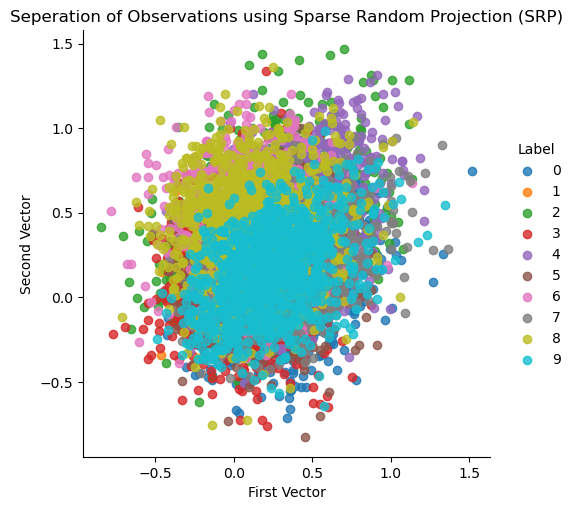

In [71]:
scatter_plot(X_test_grp, y_test, 'Sparse Random Projection (SRP)')